<a href="https://colab.research.google.com/github/AquinoJorge22/THC_TAREAS1/blob/main/THC_AquinoJorge121124.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

link='https://github.com/seismomat/HerramientasComputacionales/blob/main/Aplicaciones/ebola_outbreak_dataset-master/ebola_outbreak_dataset-master/ebola_chida.csv'
link='https://github.com/seismomat/HerramientasComputacionales/blob/main/Aplicaciones/ebola_outbreak_dataset-master/ebola_outbreak_dataset-master/ebola_2014_2016_clean.csv'
code='?raw=true'
url=link+code
df = pd.read_csv(url,sep=',',index_col=1)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

link='https://github.com/seismomat/HerramientasComputacionales/blob/main/Aplicaciones/ebola_outbreak_dataset-master/ebola_outbreak_dataset-master/ebola_chida.csv'
link='https://github.com/seismomat/HerramientasComputacionales/blob/main/Aplicaciones/ebola_outbreak_dataset-master/ebola_outbreak_dataset-master/ebola_2014_2016_clean.csv'
code='?raw=true'
url=link+code
df = pd.read_csv(url,sep=',',index_col=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2484 entries, 29/08/2014 to 23/03/2016
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  2484 non-null   object 
 1   No. of confirmed cases   2484 non-null   int64  
 2   No. of confirmed deaths  1648 non-null   float64
 3   Male Cases               2484 non-null   float64
 4   Female Cases             2484 non-null   float64
 5   Boys                     2484 non-null   float64
 6   Girls                    2484 non-null   float64
 7   Adult Male               2484 non-null   float64
 8   Adult Female             2484 non-null   float64
 9   Old Male                 2484 non-null   float64
 10  Old Female               2484 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 297.4+ KB


In [27]:
df['Country'].isin(['México']).sum()

0

In [28]:
df.isnull()

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
29/08/2014,False,False,False,False,False,False,False,False,False,False,False
29/08/2014,False,False,False,False,False,False,False,False,False,False,False
29/08/2014,False,False,False,False,False,False,False,False,False,False,False
29/08/2014,False,False,False,False,False,False,False,False,False,False,False
05/09/2014,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
23/03/2016,False,False,True,False,False,False,False,False,False,False,False
23/03/2016,False,False,True,False,False,False,False,False,False,False,False
23/03/2016,False,False,False,False,False,False,False,False,False,False,False


In [44]:
conteo=df.groupby('Country').size().reset_index(name='conteo')
conteo.sort_values('conteo',ascending=False)

,Country,conteo
2,Liberia,364
0,Guinea,259
6,Sierra Leone,259
4,Nigeria,255
5,Senegal,254
9,United States of America,245
3,Mali,243
7,Spain,243
8,United Kingdom,221
1,Italy,141


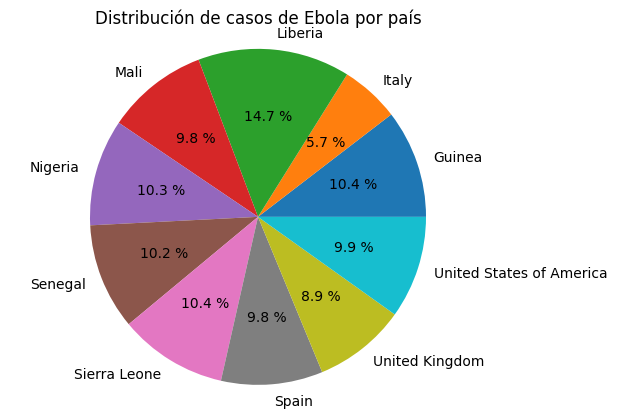

In [43]:
#colores=
plt.pie(conteo['conteo'],labels=conteo['Country'],autopct='%0.1f %%')
plt.title('Distribución de casos de Ebola por país')
plt.axis('equal')
plt.savefig('ebola_pie.png',dpi=300,format='png')
plt.show()

In [30]:
Guinea=df[df['Country']=='Guinea']
Guinea.head()

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
29/08/2014,Guinea,482,287.0,289.2,192.8,86.76,57.84,173.52,115.68,28.92,19.28
05/09/2014,Guinea,604,362.0,362.4,241.6,108.72,72.48,217.44,144.96,36.24,24.16
08/09/2014,Guinea,664,400.0,398.4,265.6,119.52,79.68,239.04,159.36,39.84,26.56
12/09/2014,Guinea,678,403.0,406.8,271.2,122.04,81.36,244.08,162.72,40.68,27.12
16/09/2014,Guinea,743,429.0,445.8,297.2,133.74,89.16,267.48,178.32,44.58,29.72


In [31]:
Guinea.shape

(259, 11)

In [32]:
Guinea.describe

<bound method NDFrame.describe of            Country  No. of confirmed cases  No. of confirmed deaths  \
Date                                                                  
29/08/2014  Guinea                     482                    287.0   
05/09/2014  Guinea                     604                    362.0   
08/09/2014  Guinea                     664                    400.0   
12/09/2014  Guinea                     678                    403.0   
16/09/2014  Guinea                     743                    429.0   
...            ...                     ...                      ...   
17/12/2015  Guinea                    3351                   2083.0   
22/12/2015  Guinea                    3351                   2083.0   
23/12/2015  Guinea                    3351                   2083.0   
29/12/2015  Guinea                    3351                   2083.0   
23/03/2016  Guinea                    3351                   2083.0   

            Male Cases  Female Cases    Boys   Girls  Adult Male  \
Date                                                               
29/08/2014       289.2         192.8   86.76   57.84      173.52   
05/09/2014       362.4         241.6  108.72   72.48      217.44   
08/09/2014       398.4         265.6  119.52   79.68      239.04   
12/09/2014       406.8         271.2  122.04   81.36      244.08   
16/09/2014       445.8         297.2  133.74   89.16      267.48   
...                ...           ...     ...     ...         ...   
17/12/2015      2010.6        1340.4  603.18  402.12     1206.36   
22/12/2015      2010.6        1340.4  603.18  402.12     1206.36   
23/12/2015      2010.6        1340.4  603.18  402.12     1206.36   
29/12/2015      2010.6        1340.4  603.18  402.12     1206.36   
23/03/2016      2010.6        1340.4  603.18  402.12     1206.36   

            Adult Female  Old Male  Old Female  
Date                                            
29/08/2014        115.68     28.92       19.28  
05/09/2014        144.96     36.24       24.16  
08/09/2014        159.36     39.84       26.56  
12/09/2014        162.72     40.68       27.12  
16/09/2014        178.32     44.58       29.72  
...                  ...       ...         ...  
17/12/2015        804.24    201.06      134.04  
22/12/2015        804.24    201.06      134.04  
23/12/2015        804.24    201.06      134.04  
29/12/2015        804.24    201.06      134.04  
23/03/2016        804.24    201.06      134.04  

[259 rows x 11 columns]>

In [33]:
mean_value=Guinea['No. of confirmed cases'].mean()
Guinea.fillna(mean_value,inplace=True)
Guinea.isnull().sum()

<ipython-input-33-91c1bc21b416>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Guinea.fillna(mean_value,inplace=True)


,0
Country,0
No. of confirmed cases,0
No. of confirmed deaths,0
Male Cases,0
Female Cases,0
Boys,0
Girls,0
Adult Male,0
Adult Female,0
Old Male,0


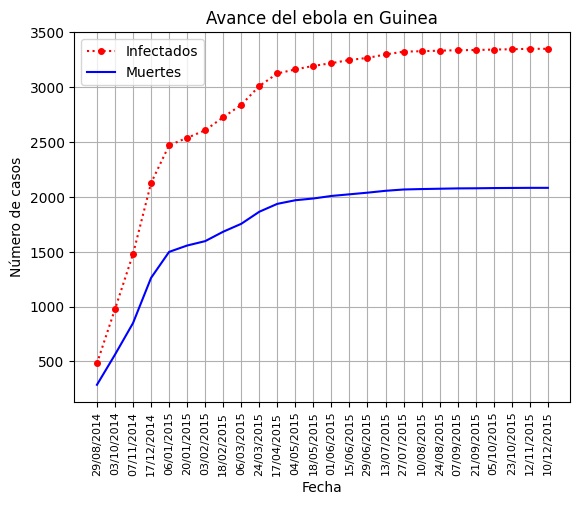

In [34]:
Guinea_infectados=Guinea['No. of confirmed cases'][0:-1:10]
Guinea_muertes=Guinea['No. of confirmed deaths'][0:-1:10]
fechas=Guinea.index[0:-1:10]
plt.plot(fechas,Guinea_infectados,'o:r', ms=4,label='Infectados')
plt.plot(fechas,Guinea_muertes,'-b',ms=4,label='Muertes')
plt.title('Avance del ebola en Guinea')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.legend()
plt.grid()
plt.xticks(rotation=90,fontsize=8)
plt.savefig('ebola_guinea.png',dpi=300,format='png')
plt.show()

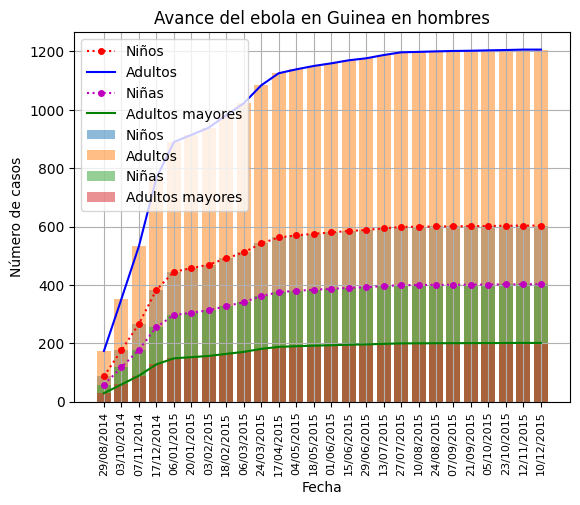

In [40]:
Guinea_boys=Guinea['Boys'][0:-1:10]
Guinea_AM=Guinea['Adult Male'][0:-1:10]
Guinea_girls=Guinea['Girls'][0:-1:10]
Guinea_OM=Guinea['Old Male'][0:-1:10]
fechas=Guinea.index[0:-1:10]

plt.plot(fechas,Guinea_boys,'o:r', ms=4,label='Niños')
plt.bar(fechas,Guinea_boys,alpha=0.5,label='Niños')

plt.plot(fechas,Guinea_AM,'-b',ms=4,label='Adultos')
plt.bar(fechas,Guinea_AM,alpha=0.5,label='Adultos')

plt.plot(fechas,Guinea_girls,'o:m', ms=4,label='Niñas')
plt.bar(fechas,Guinea_girls,alpha=0.5,label='Niñas')

plt.plot(fechas,Guinea_OM,'-g',ms=4,label='Adultos mayores')
plt.bar(fechas,Guinea_OM,alpha=0.5,label='Adultos mayores')

plt.title('Avance del ebola en Guinea en hombres')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.legend()
plt.grid()
plt.xticks(rotation=90,fontsize=8)
plt.savefig('ebola_guinea_hombres.png',dpi=300,format='png')
plt.show()